In [ ]:
!pip install datasets

**<h2>Importing All Required Libraries and Performing Basic Cleaning</h2>**

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**<h3>Filtering Data for India</h3>**

In [3]:
df_india = df[df['job_location'] == 'India']

In [4]:
df_skills = df_india.explode('job_skills')
df_skills[['job_title' , 'job_skills']]

,job_title,job_skills
38,Data Quality and Governance Analyst 1,sql
38,Data Quality and Governance Analyst 1,python
38,Data Quality and Governance Analyst 1,databricks
38,Data Quality and Governance Analyst 1,power bi
38,Data Quality and Governance Analyst 1,excel
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


**<h3>Count Skills per Job Title</h3>**

In [5]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name ='skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,5
1,airflow,Cloud Engineer,1
2,airflow,Data Analyst,31
3,airflow,Data Engineer,263
4,airflow,Data Scientist,33
...,...,...,...
1218,zoom,Data Analyst,4
1219,zoom,Data Engineer,1
1220,zoom,Data Scientist,6
1221,zoom,Senior Data Engineer,3


**<h3>Top 3 Job Roles by Skill Count</h3>**

In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
df_skills_count.sort_values(by='skill_count' ,ascending=False, inplace=True)
job_titles 

['Business Analyst', 'Cloud Engineer', 'Data Analyst']

In [7]:
df_job_title_count = df_india['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_skills_perc = pd.merge(df_skills_count,df_job_title_count , how ='left' ,on='job_title_short')
df_skills_perc['skill_percent'] =100 *  df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,1161,1855,62.587601
1,python,Data Engineer,1076,1855,58.005391
2,sql,Data Analyst,1012,2056,49.221790
3,python,Data Scientist,1003,1602,62.609238
4,sql,Data Scientist,728,1602,45.443196
...,...,...,...,...,...
1218,drupal,Data Engineer,1,1855,0.053908
1219,drupal,Machine Learning Engineer,1,71,1.408451
1220,drupal,Senior Data Engineer,1,425,0.235294
1221,solidity,Data Scientist,1,1602,0.062422


**<h3>Plotting graph for Skills Required for each Job Role</h3>**

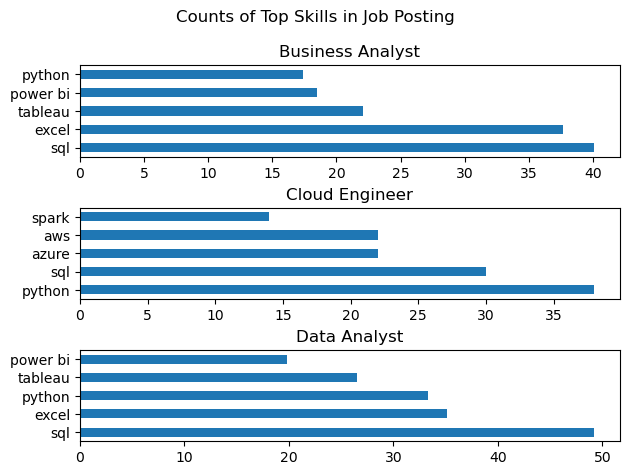

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)[::-1]

    df_plot.plot(kind='barh',x='job_skills',y='skill_percent', ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize=12)
fig.tight_layout(h_pad=0.5)
plt.show()



**<h3>Enhancing the Graph Using ChatGpt</h3>**

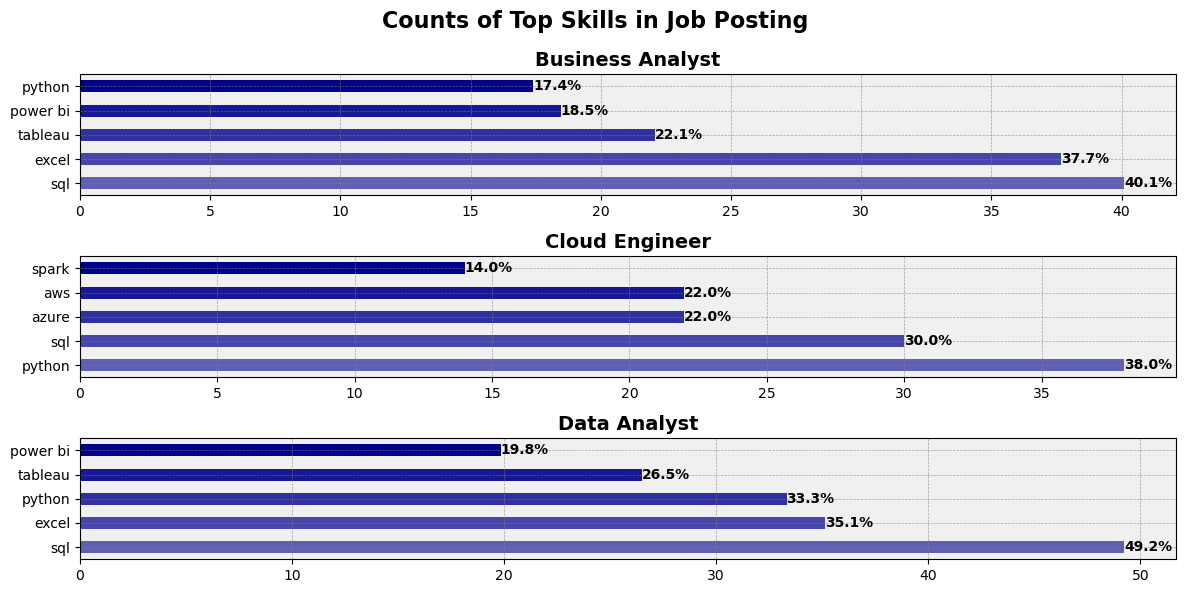

In [9]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate progressively lighter colors
def get_lighter_shades(base_color, num_shades):
    base = mcolors.to_rgba(base_color)
    colors = [mcolors.to_rgba(base_color, alpha=1 - (i / num_shades) * 0.5) for i in range(num_shades)]
    return colors

fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, len(job_titles) * 2))

# Define the base color and number of shades
base_color = 'darkblue'

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)[::-1]
    colors = get_lighter_shades(base_color, len(df_plot))
    
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], color=colors, legend=False)
    
    for j, (skill, percent) in enumerate(zip(df_plot['job_skills'], df_plot['skill_percent'])):
        ax[i].annotate(f'{percent:.1f}%', xy=(percent, j), va='center', ha='left', fontsize=10, color='black', fontweight='bold')
    
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax[i].set_facecolor('#f0f0f0')
    ax[i].set_title(job_title, fontsize=14, fontweight='bold')
    ax[i].tick_params(axis='x', which='major', labelsize=10)
    ax[i].tick_params(axis='y', which='major', labelsize=10)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize=16, fontweight='bold')
fig.tight_layout(h_pad=1)
plt.show()
